In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random



C:\Users\olekh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Osobnik to chromosow o wymiarach 2xA, 1 wiersz to liczby reprezentujące dane miasto (chromosom), a drugi wiersz to odległości między miastami (locus).
#takich osobników jest wiele, nalezy je krzyzować aby znaleźć najlepszy chromosom (najlepsza trasa)
#potem ta funkcja oceny , czyli suma odleglosci trasy wyznaczonej przez chromosom
#potem krzyżowanie, mutacja i selekcja. przy mutacji trzeba uwazac aby nie powtarzaly sie miasta w chromosomie, czyli nie mozna dodac do chromosomu miasta ktore juz jest w nim zawarte
#warunek zakończenia to znalezienie najlepszego chromosomu, czyli najlepszej trasy lub tez brak zmian.

In [3]:
def make_population(cities, pop):
    populacja=[]
    coords={}
    for i in range(pop):
        populacja.append(random.sample(range(cities), cities))
    for j in range(cities):
        coords[j]=[random.randint(0, 200), random.randint(0, 200)]
    distance_matrix = np.zeros((cities, cities))
    for i in range(cities):
        for j in range(cities):
            x1, y1 = coords[i]
            x2, y2 = coords[j]
            distance_matrix[i, j] = round(np.sqrt((x1 - x2)**2 + (y1 - y2)**2),1)

    return np.array(populacja), coords, distance_matrix


In [4]:
def calculate_distance(chromosome, distance_matrix):
    total_distance = 0
    for i in range(len(chromosome) - 1):
        total_distance += distance_matrix[chromosome[i], chromosome[i + 1]]
    return total_distance

def evaluate_and_sort_population(populacja, distance_matrix):
    distances = [calculate_distance(chrom, distance_matrix) for chrom in populacja]
    paired = list(zip(populacja, distances))
    paired.sort(key=lambda x: x[1])
    sorted_populacja, sorted_distances = zip(*paired)
    return np.array(sorted_populacja), np.array(sorted_distances)

def tournament_selection(population, distances, k=5):
    selected = random.sample(list(zip(population, distances)), k)
    selected.sort(key=lambda x: x[1])
    return selected[0][0]


In [5]:
def crossover(parent1, parent2):
    size = len(parent1)
    cxpoint1 = random.randint(0, size - 1)
    cxpoint2 = random.randint(0, size - 1)
    if cxpoint1 > cxpoint2:
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1
    child = [-1] * size
    child[cxpoint1:cxpoint2 + 1] = parent1[cxpoint1:cxpoint2 + 1]
    fill_pos = [i for i in range(size) if child[i] == -1]
    fill_values = [item for item in parent2 if item not in child]
    for i in fill_pos:
        child[i] = fill_values.pop(0)
    return child

def mutate(chromosome, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(chromosome)), 2)
        chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
    return chromosome

def select_and_produce(populacja, distance_matrix, mutation_rate):
    sorted_pop, sorted_dists = evaluate_and_sort_population(populacja, distance_matrix)
    new_population = []
    for i in range(len(populacja) // 2):
        parent1 = tournament_selection(sorted_pop, sorted_dists)
        parent2 = tournament_selection(sorted_pop, sorted_dists)
        child1 = crossover(parent1, parent2)
        child2 = crossover(parent2, parent1)
        new_population.append(mutate(child1, mutation_rate))
        new_population.append(mutate(child2, mutation_rate))
    return np.array(new_population)

def genetic_algorithm(cities, pop_size, mutation_rate, generations):
    populacja, coords, distance_matrix = make_population(cities, pop_size)
    best_chromosome = None
    best_distance = float('inf')
    no_improvement = 0
    best_fitness_history = []
    avg_fitness_history = []
    for generation in range(generations):
        populacja = select_and_produce(populacja, distance_matrix, mutation_rate)
        sorted_pop, sorted_dists = evaluate_and_sort_population(populacja, distance_matrix)
        current_best = sorted_dists[0]
        current_best_chromosome = sorted_pop[0]
        best_fitness_history.append(current_best)
        avg_fitness_history.append(np.mean(sorted_dists))
        print(f"Pokolenie {generation + 1}: liczebność generacji: {len(populacja)}, średnia długość trasy: {np.mean(sorted_dists)}")


        if current_best < best_distance:
            best_distance = current_best
            best_chromosome = current_best_chromosome
            no_improvement = 0

        else:
            no_improvement += 1

        if no_improvement >= 8:
            print(f"Przerwano po {generation + 1} generacjach — brak poprawy.")
            break
    return best_chromosome, best_distance, best_fitness_history, avg_fitness_history
best_chromosome, best_distance, best_fitness_history, avg_fitness_history = genetic_algorithm(20, 2000, 0.1, 100)

Pokolenie 1: liczebność generacji: 2000, średnia długość trasy: 1775.8653
Pokolenie 2: liczebność generacji: 2000, średnia długość trasy: 1659.33385
Pokolenie 3: liczebność generacji: 2000, średnia długość trasy: 1585.3546000000001
Pokolenie 4: liczebność generacji: 2000, średnia długość trasy: 1518.15365
Pokolenie 5: liczebność generacji: 2000, średnia długość trasy: 1468.25675
Pokolenie 6: liczebność generacji: 2000, średnia długość trasy: 1415.4939
Pokolenie 7: liczebność generacji: 2000, średnia długość trasy: 1367.5264
Pokolenie 8: liczebność generacji: 2000, średnia długość trasy: 1328.7408500000001
Pokolenie 9: liczebność generacji: 2000, średnia długość trasy: 1299.2053999999998
Pokolenie 10: liczebność generacji: 2000, średnia długość trasy: 1262.99575
Pokolenie 11: liczebność generacji: 2000, średnia długość trasy: 1227.7906
Pokolenie 12: liczebność generacji: 2000, średnia długość trasy: 1195.3816499999998
Pokolenie 13: liczebność generacji: 2000, średnia długość trasy: 1157

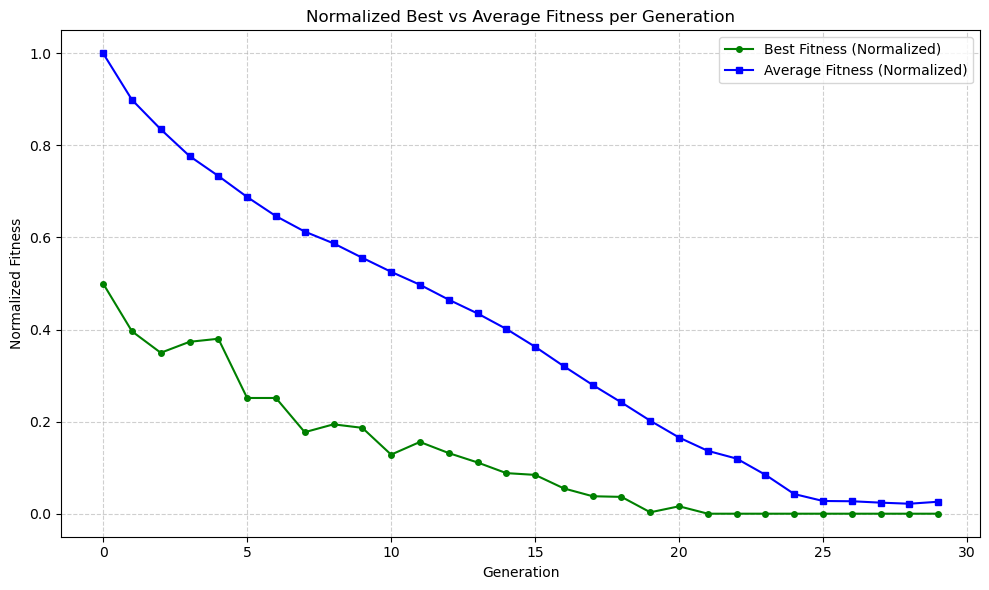

In [6]:
min_val = min(min(best_fitness_history), min(avg_fitness_history))
max_val = max(max(best_fitness_history), max(avg_fitness_history))

best_fitness_norm = [(x - min_val) / (max_val - min_val) for x in best_fitness_history]
avg_fitness_norm = [(x - min_val) / (max_val - min_val) for x in avg_fitness_history]

gen_num = list(range(len(best_fitness_history)))

plt.figure(figsize=(10, 6))
plt.plot(gen_num, best_fitness_norm, label='Best Fitness (Normalized)', marker='o', ms=4, color='green')
plt.plot(gen_num, avg_fitness_norm, label='Average Fitness (Normalized)', marker='s', ms=4, color='blue')

plt.xlabel('Generation')
plt.ylabel('Normalized Fitness')
plt.title('Normalized Best vs Average Fitness per Generation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [7]:
make_population(20, 10)

(array([[14,  2,  9, 13,  0, 11, 19,  7, 10,  5,  3,  6, 17,  8, 12, 16,
          1, 18, 15,  4],
        [ 6,  1, 18,  7, 17,  9,  8, 19, 10,  3, 15, 12,  0, 11,  4,  5,
         13,  2, 16, 14],
        [ 2, 12, 16, 18,  0,  9,  1, 13, 14, 17,  8,  4, 11, 10,  3,  6,
          7, 19,  5, 15],
        [12, 16,  1,  9, 10, 17, 15, 18,  4,  6,  8,  7,  5,  2, 14, 19,
         13,  0, 11,  3],
        [15, 14,  5, 12,  0,  1,  3, 10, 18, 11,  4,  2, 19,  6, 13,  8,
          7,  9, 17, 16],
        [ 6, 11,  1,  2, 15, 14,  7,  4, 19, 16,  8,  0,  3,  9, 12, 18,
         17, 10, 13,  5],
        [11,  9, 12,  5, 16,  8, 19,  2,  0, 14,  6,  7, 18, 10,  4,  3,
         13,  1, 15, 17],
        [16,  6,  2, 12, 15,  8, 19,  5, 10, 13,  7,  9,  0,  4, 11, 14,
          3,  1, 17, 18],
        [ 3, 17, 14,  2,  5,  6,  1, 19, 15, 11, 16,  8, 13,  4,  7, 18,
         10,  0,  9, 12],
        [ 1,  4, 16,  8,  6, 10,  0,  9, 13,  2,  7, 12, 19,  5, 18, 14,
          3, 11, 17, 15]]),
 {0: [12